
First 5 rows of dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


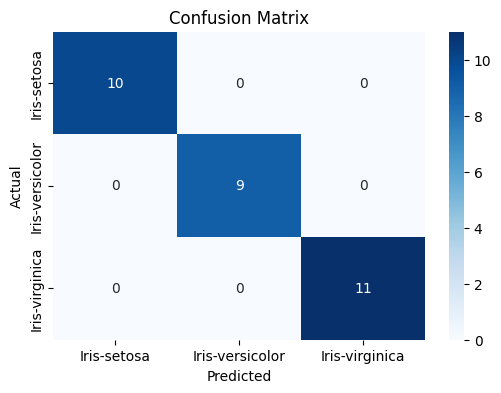

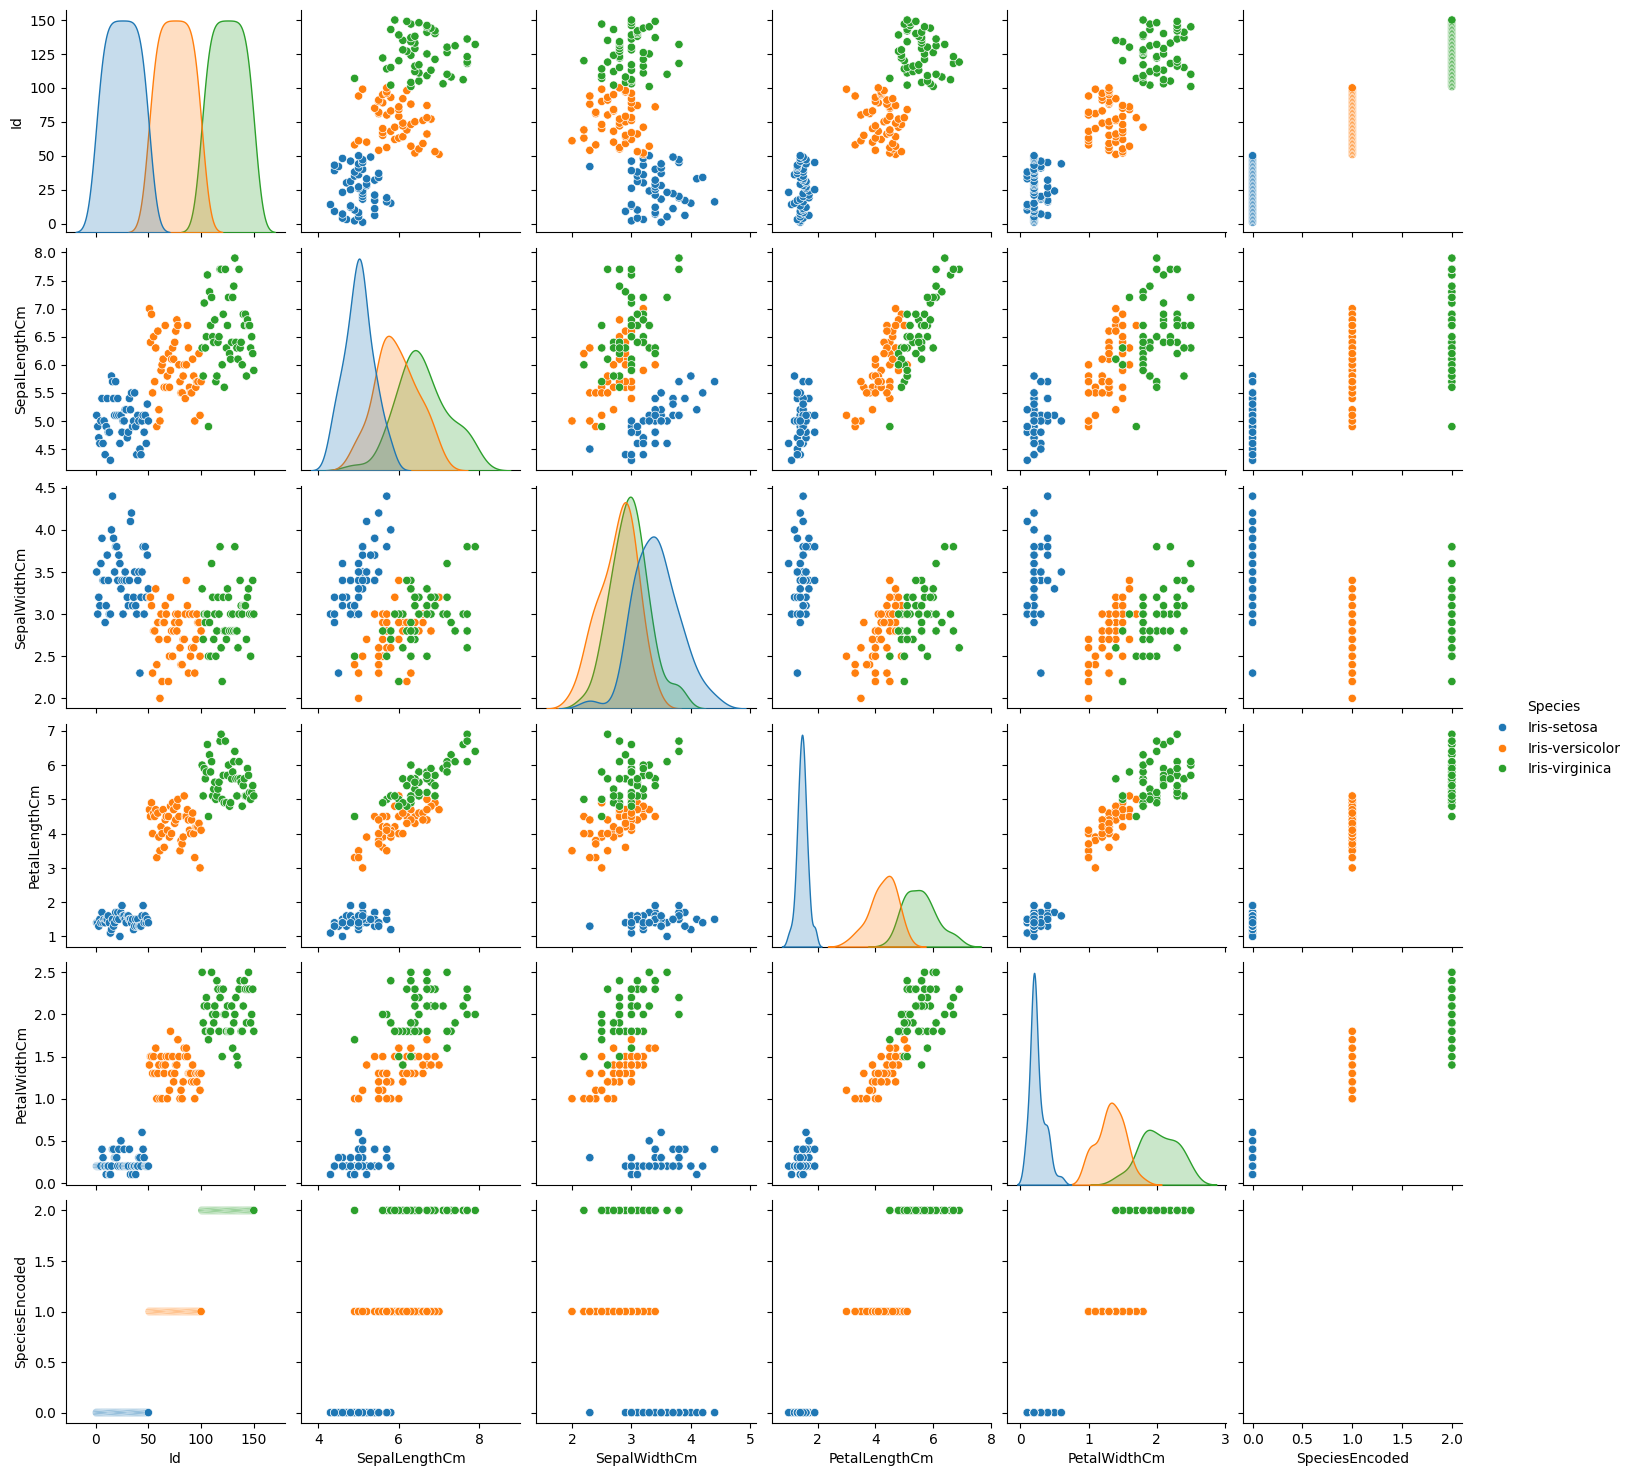


Prediction for sample [[5.1, 3.5, 1.4, 0.2]] : Iris-setosa


C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
# ----------------------------------------------------------
# IRIS FLOWER CLASSIFICATION 
# ----------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------------------------------------------
# 2. LOAD DATASET 
# ----------------------------------------------------------
df = pd.read_csv("iris.csv")

print("\nFirst 5 rows of dataset:")
print(df.head())

# ----------------------------------------------------------
# 3. ENCODE SPECIES COLUMN
# ----------------------------------------------------------
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

# Features and target
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["SpeciesEncoded"]

# ----------------------------------------------------------
# 4. TRAIN / TEST SPLIT
# ----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------------------------------
# 5. TRAIN RANDOM FOREST CLASSIFIER
# ----------------------------------------------------------
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ----------------------------------------------------------
# 6. PREDICTIONS & EVALUATION
# ----------------------------------------------------------
y_pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# ----------------------------------------------------------
# 7. CONFUSION MATRIX HEATMAP
# ----------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------------------------------------
# 8. PAIRPLOT (FEATURE RELATIONSHIPS)
# ----------------------------------------------------------
sns.pairplot(df, hue="Species")
plt.show()

# ----------------------------------------------------------
# 9. PREDICT NEW SAMPLE
# ----------------------------------------------------------
sample = [[5.1, 3.5, 1.4, 0.2]]  
prediction = model.predict(sample)
species_name = le.inverse_transform(prediction)[0]

print("\nPrediction for sample", sample, ":", species_name)